In [1]:
## Importing the libraries
import pandas as pd  # for data manipulation and analysis
import numpy as np  # for scientific computing with Python
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
%matplotlib inline  
from scipy.stats import shapiro, skew # for checking the normality of the data
from sklearn.linear_model import LogisticRegression # for logistic regression
lr = LogisticRegression() # defining the logistic regression model
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
rf = RandomForestClassifier() # defining the random forest classifier model
from sklearn.neighbors import KNeighborsClassifier # for KNN classifier
knn = KNeighborsClassifier() # defining the KNN classifier model
from sklearn.model_selection import train_test_split # for splitting the data into train and test
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,recall_score, precision_score, f1_score # for evaluating the model
from sklearn.preprocessing import StandardScaler,MinMaxScaler,QuantileTransformer # for standardizing the data
s_scaler = StandardScaler() # defining the standard scaler
m_scaler = MinMaxScaler() # defining the min max scaler
q_scaler = QuantileTransformer() # defining the quantile transformer
from sklearn.preprocessing import LabelEncoder # for encoding the categorical data
encoder = LabelEncoder() # defining the encoder
from warnings import filterwarnings # for ignoring the warnings
filterwarnings('ignore')

In [2]:
## Importing the dataset
df = pd.read_csv('Myers Briggs Table_S1.csv')
df.head()

,S No,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
0,1,53,62,125,Female,Low,0.0,0.0,0.0,0.0,ESFJ,18,3,17,9,9,13,18,4,A
1,2,52,69,157,Male,High,7.0,8.0,5.0,3.0,ISTJ,6,15,14,12,21,3,13,9,B
2,3,30,69,200,Male,High,0.0,0.0,0.0,0.0,ESTJ,15,6,16,10,15,9,12,10,A
3,4,51,66,175,Male,Moderate,9.5,9.5,9.5,1.5,ISTJ,6,15,21,5,13,11,19,3,D
4,5,45,63,199,Female,Moderate,4.0,5.0,2.0,2.0,ENFJ,14,7,20,6,9,15,16,6,A


In [3]:
## Dropping the S No column
df1 = df.drop(['S No'], axis=1)
df1.head()

,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
0,53,62,125,Female,Low,0.0,0.0,0.0,0.0,ESFJ,18,3,17,9,9,13,18,4,A
1,52,69,157,Male,High,7.0,8.0,5.0,3.0,ISTJ,6,15,14,12,21,3,13,9,B
2,30,69,200,Male,High,0.0,0.0,0.0,0.0,ESTJ,15,6,16,10,15,9,12,10,A
3,51,66,175,Male,Moderate,9.5,9.5,9.5,1.5,ISTJ,6,15,21,5,13,11,19,3,D
4,45,63,199,Female,Moderate,4.0,5.0,2.0,2.0,ENFJ,14,7,20,6,9,15,16,6,A


In [4]:
print("Unique values of Sex column:", df1['SEX'].unique())
print("Unique values of Activity Level column:", df1['ACTIVITY LEVEL'].unique())
print("Unique values of MBTI column:", df1['MBTI'].unique())

Unique values of Sex column: ['Female' 'Male']
Unique values of Activity Level column: ['Low' 'High' 'Moderate']
Unique values of MBTI column: ['ESFJ' 'ISTJ' 'ESTJ' 'ENFJ' 'ISFP' 'ISTP' 'INFJ' 'ENTP' 'ISFJ' 'ENTJ'
 'ESTP' 'ENFP' 'ESFP' 'INFP' 'INTJ']


In [6]:
print("Unique values of Sex column:", df1['SEX'].unique())
print("Unique values of Activity Level column:", df1['ACTIVITY LEVEL'].unique())
print("Unique values of MBTI column:", df1['MBTI'].unique())

Unique values of Sex column: ['Female' 'Male']
Unique values of Activity Level column: ['Low' 'High' 'Moderate']
Unique values of MBTI column: ['ESFJ' 'ISTJ' 'ESTJ' 'ENFJ' 'ISFP' 'ISTP' 'INFJ' 'ENTP' 'ISFJ' 'ENTJ'
 'ESTP' 'ENFP' 'ESFP' 'INFP' 'INTJ']


In [7]:
## Checking the shape of the dataset
df1.shape

(97, 19)

In [8]:
## Checking info of the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AGE             97 non-null     int64  
 1   HEIGHT          97 non-null     int64  
 2   WEIGHT          97 non-null     int64  
 3   SEX             97 non-null     object 
 4   ACTIVITY LEVEL  97 non-null     object 
 5   PAIN 1          97 non-null     float64
 6   PAIN 2          97 non-null     float64
 7   PAIN 3          97 non-null     float64
 8   PAIN 4          97 non-null     float64
 9   MBTI            97 non-null     object 
 10  E               97 non-null     int64  
 11  I               97 non-null     int64  
 12  S               97 non-null     int64  
 13  N               97 non-null     int64  
 14  T               97 non-null     int64  
 15  F               97 non-null     int64  
 16  J               97 non-null     int64  
 17  P               97 non-null     int64

In [12]:
df_encoded = df1.copy()
df_encoded['SEX'] = encoder.fit_transform(df_encoded['SEX'])
df_encoded['ACTIVITY LEVEL'] = encoder.fit_transform(df_encoded['ACTIVITY LEVEL'])
df_encoded['POSTURE'] = encoder.fit_transform(df_encoded['POSTURE'])

df_encoded.head()

,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
0,53,62,125,0,1,0.0,0.0,0.0,0.0,ESFJ,18,3,17,9,9,13,18,4,0
1,52,69,157,1,0,7.0,8.0,5.0,3.0,ISTJ,6,15,14,12,21,3,13,9,1
2,30,69,200,1,0,0.0,0.0,0.0,0.0,ESTJ,15,6,16,10,15,9,12,10,0
3,51,66,175,1,2,9.5,9.5,9.5,1.5,ISTJ,6,15,21,5,13,11,19,3,3
4,45,63,199,0,2,4.0,5.0,2.0,2.0,ENFJ,14,7,20,6,9,15,16,6,0


In [13]:
df_encoded['POSTURE'].median()

1.0

In [14]:
print("Unique values of Sex column:", df_encoded['SEX'].unique())
print("Unique values of Activity Level column:", df_encoded['ACTIVITY LEVEL'].unique())
print("Unique values of MBTI column:", df_encoded['MBTI'].unique())

Unique values of Sex column: [0 1]
Unique values of Activity Level column: [1 0 2]
Unique values of MBTI column: ['ESFJ' 'ISTJ' 'ESTJ' 'ENFJ' 'ISFP' 'ISTP' 'INFJ' 'ENTP' 'ISFJ' 'ENTJ'
 'ESTP' 'ENFP' 'ESFP' 'INFP' 'INTJ']


In [15]:
df_encoded.describe()

,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,E,I,S,N,T,F,J,P,POSTURE
count,97.000000,97.000000,97.00000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,43.855670,65.731959,159.43299,0.494845,1.113402,2.139175,3.747423,1.943299,2.530928,12.690722,8.288660,15.134021,11.041237,10.505155,13.443299,10.319588,11.680412,1.381443
std,16.776093,3.737522,36.19591,0.502571,0.476014,2.572635,3.191071,2.587909,3.111483,5.717956,5.697146,4.833970,4.732242,5.332924,5.297344,5.727395,5.711003,1.055179
min,11.000000,58.000000,68.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,5.000000,1.000000,0.000000,2.000000,0.000000,2.000000,0.000000
25%,30.000000,63.000000,135.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8.000000,3.000000,12.000000,7.000000,6.000000,10.000000,5.000000,6.000000,1.000000
50%,45.000000,66.000000,157.00000,0.000000,1.000000,1.000000,3.000000,0.500000,0.000000,13.000000,8.000000,15.000000,11.000000,11.000000,13.000000,11.000000,11.000000,1.000000
75%,56.000000,68.000000,183.00000,1.000000,1.000000,4.000000,7.000000,3.500000,5.000000,18.000000,13.000000,19.000000,14.000000,14.000000,18.000000,16.000000,17.000000,2.000000
max,82.000000,74.000000,263.00000,1.000000,2.000000,9.500000,10.000000,10.000000,10.000000,21.000000,19.000000,25.000000,21.000000,22.000000,24.000000,20.000000,22.000000,3.000000


In [16]:
## Checking columns of the dataset
df_encoded.columns

Index(['AGE', 'HEIGHT', 'WEIGHT', 'SEX', 'ACTIVITY LEVEL', 'PAIN 1', 'PAIN 2',
       'PAIN 3', 'PAIN 4', 'MBTI', 'E', 'I', 'S', 'N', 'T', 'F', 'J', 'P',
       'POSTURE'],
      dtype='object')

<AxesSubplot: >

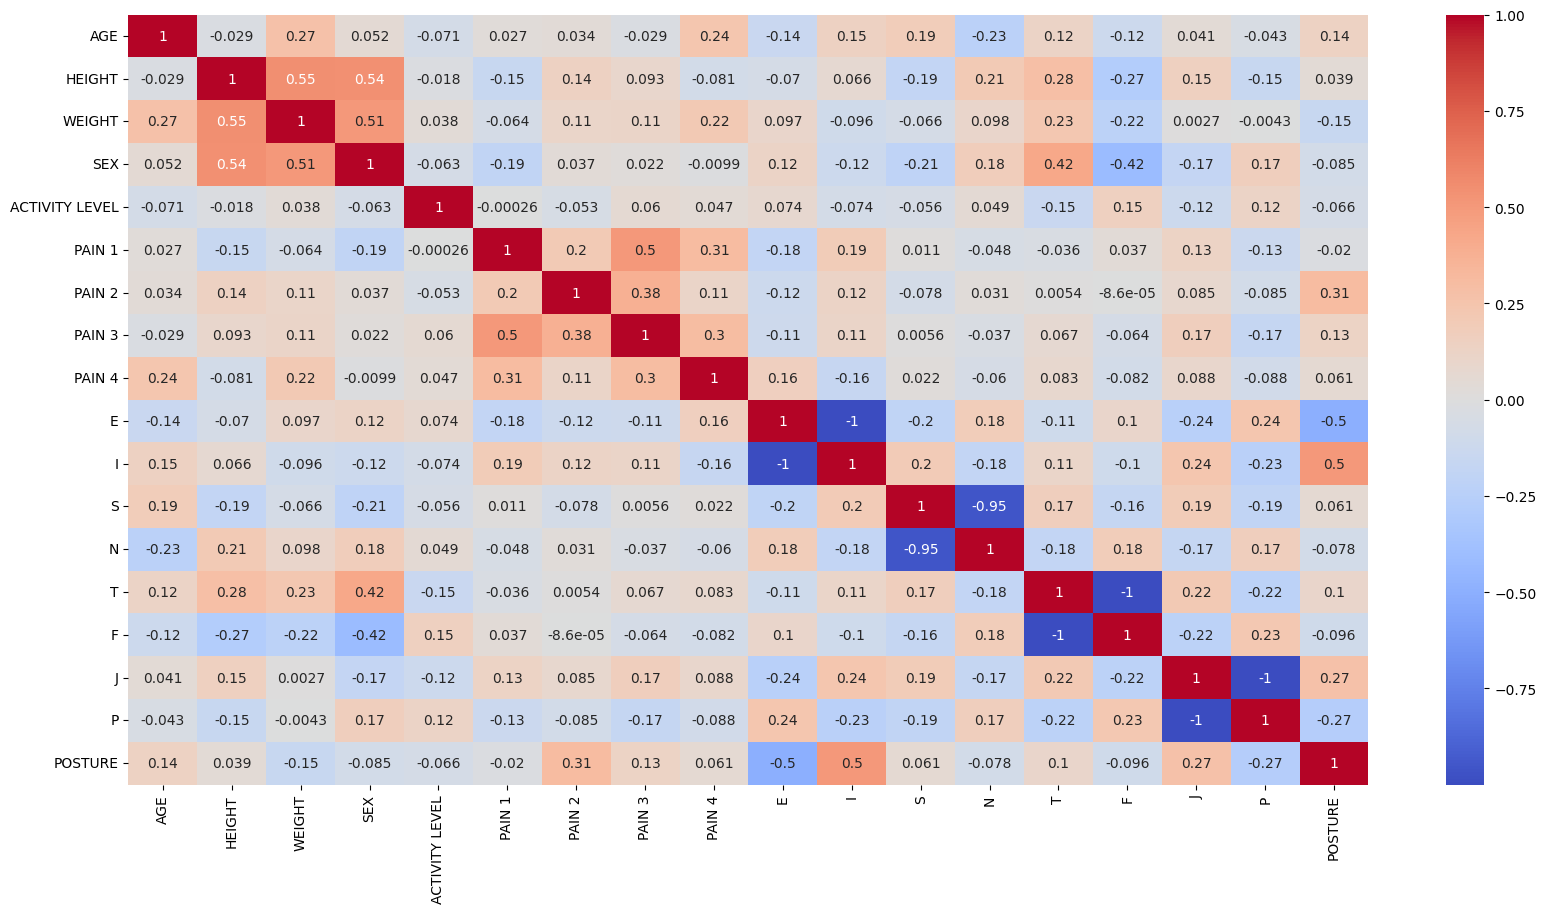

In [17]:
## heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')


In [18]:
## splitting data set into X and y
X = df_encoded.drop(['MBTI'], axis=1)
y = df_encoded['MBTI']

<AxesSubplot: >

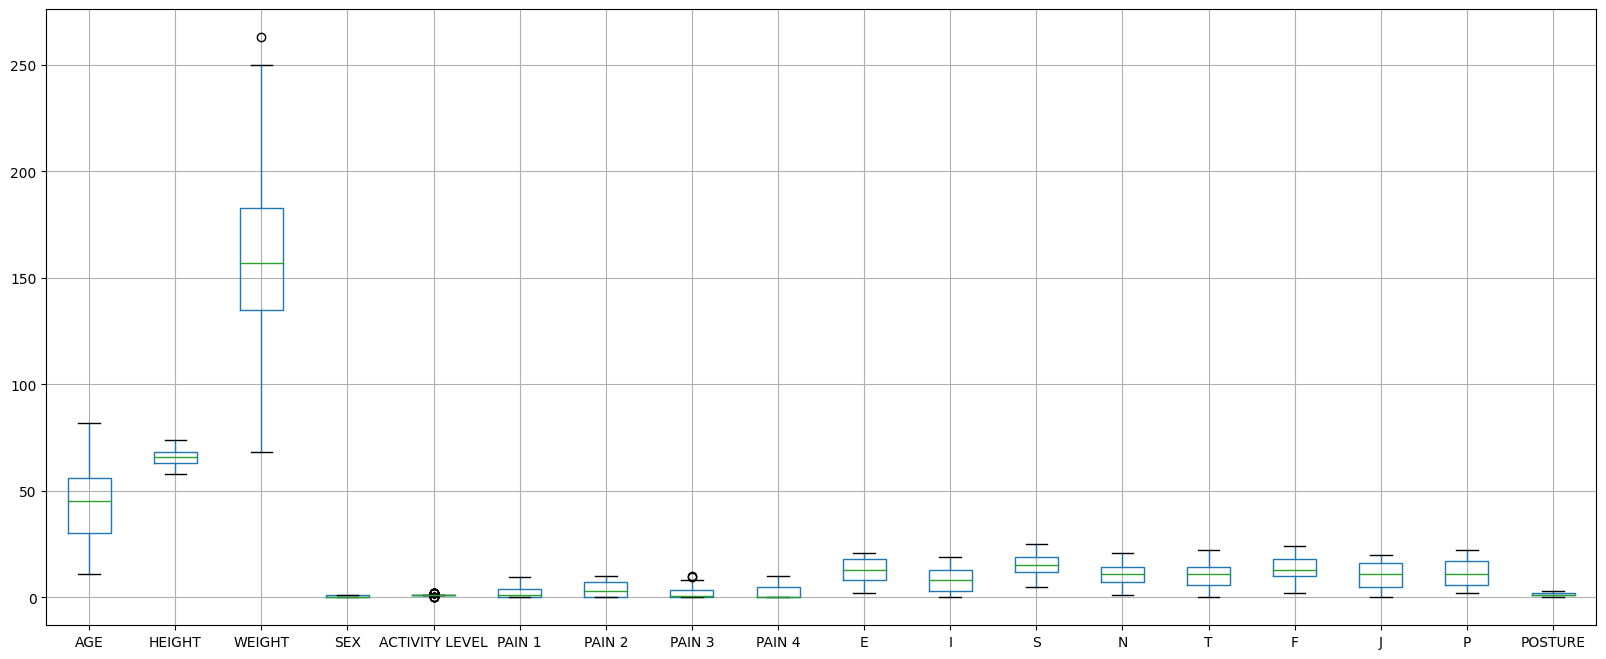

In [19]:
## checking for outliers in X
X.boxplot(figsize=(20,8))

array([[<AxesSubplot: title={'center': 'AGE'}>,
        <AxesSubplot: title={'center': 'HEIGHT'}>,
        <AxesSubplot: title={'center': 'WEIGHT'}>,
        <AxesSubplot: title={'center': 'SEX'}>],
       [<AxesSubplot: title={'center': 'ACTIVITY LEVEL'}>,
        <AxesSubplot: title={'center': 'PAIN 1'}>,
        <AxesSubplot: title={'center': 'PAIN 2'}>,
        <AxesSubplot: title={'center': 'PAIN 3'}>],
       [<AxesSubplot: title={'center': 'PAIN 4'}>,
        <AxesSubplot: title={'center': 'E'}>,
        <AxesSubplot: title={'center': 'I'}>,
        <AxesSubplot: title={'center': 'S'}>],
       [<AxesSubplot: title={'center': 'N'}>,
        <AxesSubplot: title={'center': 'T'}>,
        <AxesSubplot: title={'center': 'F'}>,
        <AxesSubplot: title={'center': 'J'}>],
       [<AxesSubplot: title={'center': 'P'}>,
        <AxesSubplot: title={'center': 'POSTURE'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

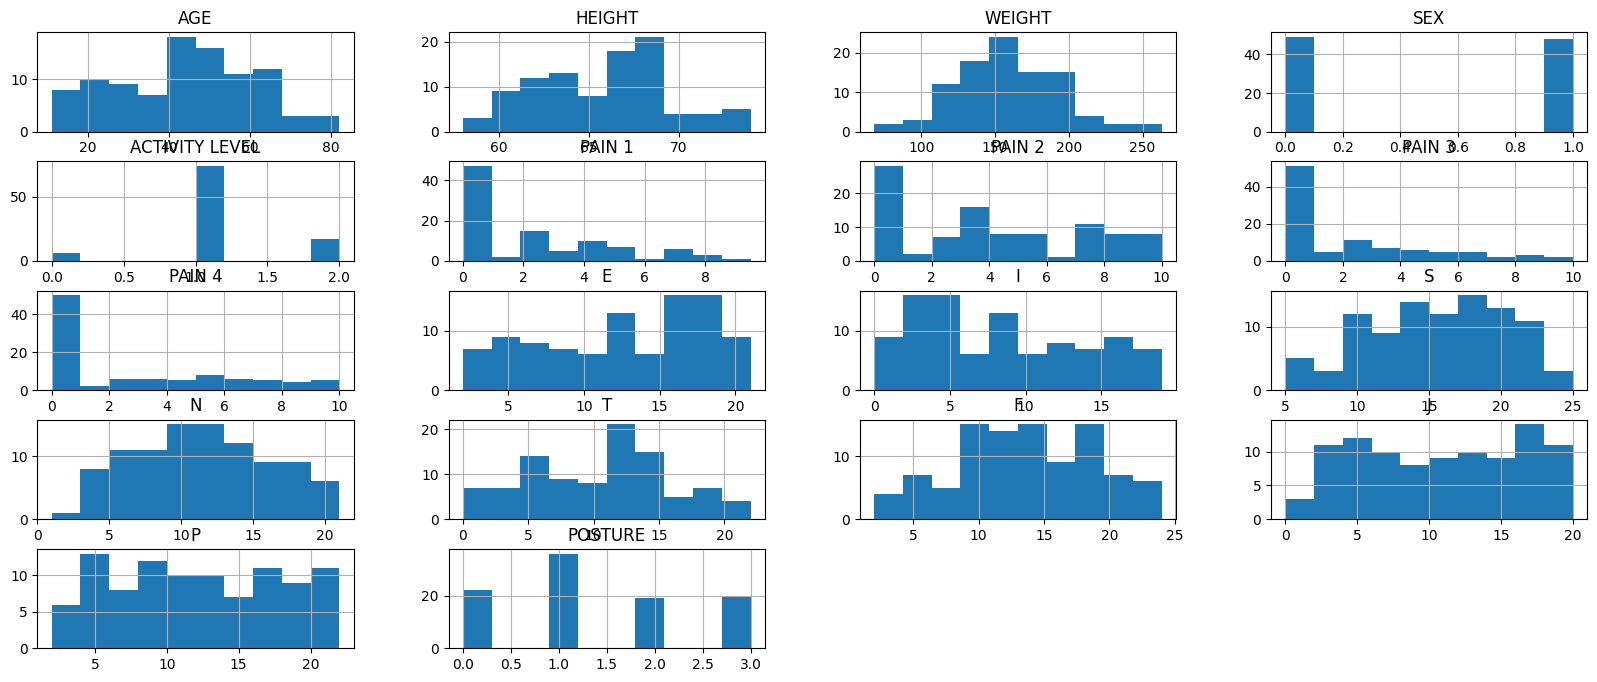

In [20]:
## Checking normalization of X
X.hist(figsize=(20,8))

array([[<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>]],
      dtype=object)

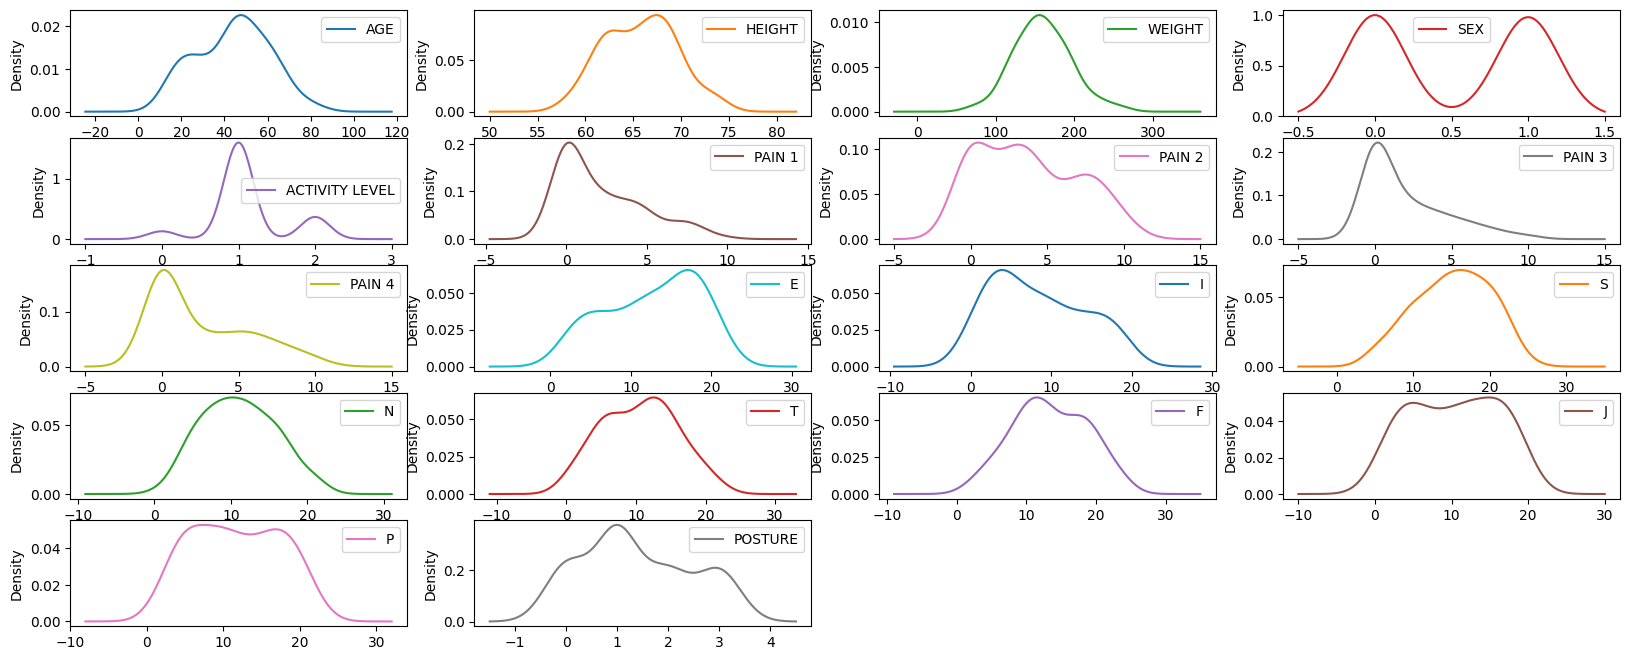

In [21]:
## Check normalization of X with line
X.plot(kind='density', subplots=True, layout=(5,4), sharex=False, figsize=(20,8))

In [22]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = column/upper
    return y

In [23]:
X['PAIN 1'].skew()

1.0126209036776674

In [24]:
pain_1_log = np.log(X['PAIN 1'] + 0.2)
#pain_1_log.skew()
pain_1_norm = normalize(pain_1_log)
pain_1_norm.skew()

0.07045365237491971

In [25]:
pain_2_log = np.log(X['PAIN 2'] + 7)
#pain_2_log.skew()
pain_2_norm = normalize(pain_2_log)
pain_2_norm.skew()

0.030945147468956675

In [26]:
pain_3_log = np.log(X['PAIN 3'] + 0.001)
#pain_3_log.skew()
pain_3_norm = normalize(pain_3_log)
pain_3_norm.skew()

0.02915715729787898

In [27]:
pain_4_log = np.log(X['PAIN 4'] + 0.001)
#pain_4_log.skew()
pain_4_norm = normalize(pain_4_log)
pain_4_norm.skew()

0.052022636380115804

In [28]:
pain_1 = pd.DataFrame(pain_1_norm)
pain_3 = pd.DataFrame(pain_3_norm)
pain_4 = pd.DataFrame(pain_4_norm)

In [29]:
X['PAIN 3'] = pain_3
X['PAIN 4'] = pain_4
X.head()

,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,E,I,S,N,T,F,J,P,POSTURE
0,53,62,125,0,1,0.0,0.0,-2.999870,-2.999870,18,3,17,9,9,13,18,4,0
1,52,69,157,1,0,7.0,8.0,0.699026,0.477245,6,15,14,12,21,3,13,9,1
2,30,69,200,1,0,0.0,0.0,-2.999870,-2.999870,15,6,16,10,15,9,12,10,0
3,51,66,175,1,2,9.5,9.5,0.977727,0.176373,6,15,21,5,13,11,19,3,3
4,45,63,199,0,2,4.0,5.0,0.301234,0.301234,14,7,20,6,9,15,16,6,0


In [30]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.25)
rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(Y_test,Y_pred))
print("recall:", recall_score(Y_test,Y_pred, average='weighted'))



Accuracy: 0.6
recall: 0.6


In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.25)
lr.fit(X_train,Y_train)
Y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(Y_test,Y_pred))
print("recall:", recall_score(Y_test,Y_pred, average='weighted'))

Accuracy: 0.88
recall: 0.88


In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.25)
knn.fit(X_train,Y_train)
Y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(Y_test,Y_pred))
print("recall:", recall_score(Y_test,Y_pred, average='weighted'))

Accuracy: 0.88
recall: 0.88


In [33]:
df_encoded.columns

Index(['AGE', 'HEIGHT', 'WEIGHT', 'SEX', 'ACTIVITY LEVEL', 'PAIN 1', 'PAIN 2',
       'PAIN 3', 'PAIN 4', 'MBTI', 'E', 'I', 'S', 'N', 'T', 'F', 'J', 'P',
       'POSTURE'],
      dtype='object')

In [34]:
## fit the model on whole dataset
rf.fit(X,y)




RandomForestClassifier()

In [35]:

X_new = [[[19.0],[161.544],[176.0],[0],[2.0],[4.0],[3.5],[7.0],[2.5],[8.0],[12.0],[15.0],[11.0],[11.0],[18.0],[15.0],[16],[1]]]

In [36]:
rf.predict(X_new)

ValueError: Found array with dim 3. RandomForestClassifier expected <= 2.